# Cheers!!  Stats with Beers



In this lesson we will show how data combined with practical methods can help us to answer queastions. The practical methods we will go for in this notebook are basic tools of statistics. 

First of all we need data to analyze. We will use data from Craft Beers from the [CraftCans](http://craftcans.com/db.php?search=all&sort=beerid&ord=desc&view=text) website. We are not going to use the data directly from the webpage, but data from the webpage that was already cleaned up by Jean-Nicholas Hould who we want to thanks for having an MIT license on his github repository so we can reuse his [work](https://github.com/nickhould/craft-beers-dataset).  

The dataset contains data from canned beers in the United States. The website doesn't specify if the dataset contains all the canned beers brewed in the country or not. Therefore we will asume this dataset is a sample that might contain biases

We will manipulate our data with `numpy` but to read the data we will need `pandas` in this case. 

"[`pandas`](http://pandas.pydata.org/) is an open source library that provides high-performance, easy-to-use data structures and data analysis tools.  Even though `pandas` is great for data analysis we won't be exploiting its power in this notebook, we will use it to read the `csv` file, display it in a nice table and, extract the columns we need and convert them in `numpy` arrays to finally, manipulate them to get useful information. 

In [1]:
import pandas
import numpy

In [2]:
!head "../../data/beers.csv"

,abv,ibu,id,name,style,brewery_id,ounces
0,0.05,,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.09,,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,,2262,Sex and Candy,American IPA,177,12.0
5,0.077,,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,,2259,Foreman,American Porter,177,12.0
8,0.055,,2258,Jade,American Pale Ale (APA),177,12.0


In [3]:
beers = pandas.read_csv("../../data/beers.csv")

Let's check what is the type of data structure of `beers`. Rememeber that we cna use the function `type()` to do this.

In [4]:
type(beers)

pandas.core.frame.DataFrame

What we have here is a `pandas DataFrame`. "A `DataFrame`  is a 2-dimensional labeled data structure with columns of potentially different types" [4]. You can think of it as a spreadsheet. 

In [5]:
beers

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


Where:

- `abv`: Alcohol by volume of the beer.
- `ibu`: International Bittering Units of the beer.
- `id`: Unique identifier of the beer.
- `name`: Name of the beer.
- `style`: Style of the beer.
- `brewery_id`: Unique identifier of the brewery.
- `ounces`: Ounces of beer.

## Exploratory data analysis

By exploring our data we can get useful information. In statistics [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) is an approach to analyze data with the purpose of summarizing the main characteristics of our dataset. The main idea of EDA is seeing what the data is telling us beyond formal modeling or hypotesis testing task. [2]

Let's extract the columns for `abv` and `ibu` and convert them in numpy arrays. We can access a certain column from a `DataFrame` by doing:

```python
data_frame['name_of_column']
```

The result of this action is a `pandas Serie`. "A `Serie` is a 1-dimensional labeled array capable of holding any data type." [4]


In [6]:
type(beers['abv'])

pandas.core.series.Series

In [7]:
#Showing the first 10 elements
beers['abv'][:10]

0    0.050
1    0.066
2    0.071
3    0.090
4    0.075
5    0.077
6    0.045
7    0.065
8    0.055
9    0.086
Name: abv, dtype: float64

If we inspect the data in the table above you will notice that there are `Not a Number` elements in both `abv` and `ibu` columns, those values mean that there was no data reported for that beer.

First extract the Series corresponding to `abv` and `ibu`, clean the data by removing Not a Number `NaN`, and then access to the values of the Serie and assign them to an array. 

In [8]:
abv_serie = beers['abv']

In [9]:
len(abv_serie)

2410

Use method dropna, explain what we use it for "Return Series without null values"

In [10]:
abv_clean = abv_serie.dropna()

In [11]:
len(abv_clean)

2348

We can access the values of the `abv_clean` by doing `abv_clean.values`. The result of that operation is a `numpy.ndarray` (multidimensional array) in this case of one dimension. 

In [12]:
abv = abv_clean.values

In [13]:
print(abv)

[ 0.05   0.066  0.071 ...,  0.055  0.055  0.052]


In [14]:
type(abv)

numpy.ndarray

Repeating the process for `ibu`:

In [15]:
ibu_serie = beers['ibu']

len(ibu_serie)

2410

In [16]:
ibu_clean = ibu_serie.dropna()

ibu = ibu_clean.values

len(ibu)

1405

##### Exercise

Write a function that calculates the percentage of missing values for a certain array. Use the function to calculate the percentage of missing values for the `abv` and `ibu` data sets. 

For the original array, before cleaning, rememeber that you can access the values of a Serie by doing `serie.value` (eg. `abv_serie.values`)

**Answer**

To reveal the answers, highlight the following lines of text using the mouse:

* Percentage of missing `abv` values: <span style="color:white"> 2.57 </span>.

* Percentage of missing `ibu` values: <span style="color:white"> 41.70 </span>.

*Important note:*

Notice that in the case of the variable `ibu` we are missing almost 42%. This is relevant for us because it will affect our analysis. When w do descriptive statistics we will ignore these missing values, and having a 42% missing will certainly cause a bias.

## Ready, Stats, go!!!


Allright, now we have `numpy` arrays let's see how we manipulate them to get some useful information. 

We will walk through various "descriptive statistics". In other words we will generate statistics that summarize the data concisely.

We will focus on the numerical variables `abv` and `ibu` that we converted to `numpy` arrays and now have no `NaN` entries. 

### Maximum and Minimum 

The minimum and maximum value of a dataset are helpful to understand the range of values in a variable.

We can obtained the minmum and maximum values of our `abv` and `ibu` arrays with the `min()` and `max()` functions from numpy. 

**abv**

In [17]:
abv_min = numpy.min(abv)
abv_max = numpy.max(abv)

In [18]:
print('The minimum value for abv is: ', abv_min)
print('The maximum value for abv is: ', abv_max)

The minimum value for abv is:  0.001
The maximum value for abv is:  0.128


**ibu**

In [19]:
ibu_min = numpy.min(ibu)
ibu_max = numpy.max(ibu)

In [20]:
print('The minimum value for ibu is: ', ibu_min)
print('The maximum value for ibu is: ', ibu_max)

The minimum value for ibu is:  4.0
The maximum value for ibu is:  138.0


### Mean value

If we have a sample of $n$ values, $x_i$, the mean, $\bar{x}$, is defined by:

\begin{equation*}
    \bar{x} = \frac{1}{n}\sum_{i} x_i
\end{equation*}

in words, that means, the sum of the values divided by the number of values. 

We've already seen in module 1 how to write a function to compute the mean, and we also learned that we can compute this using numpy. Let's use this to compute the mean of our two variables.  

In [21]:
abv_mean = numpy.mean(abv)
ibu_mean = numpy.mean(ibu)

Now we will print these two variables but we will learn a new way of printing. We will use the string formatter from python `.format()`.  

In [22]:
print('The mean value for abv is {} and for ibu {}'.format(abv_mean, ibu_mean))

The mean value for abv is 0.059773424190800686 and for ibu 42.71316725978647


Ugh! that doesn't look that good. Let print less decimal digits so the sentence is more readable. For example, if we want to have for decimal digits we specify that by doing:

In [23]:
print('The mean value for abv is {:.4f} and for ibu {:.4f}'.format(abv_mean, ibu_mean))

The mean value for abv is 0.0598 and for ibu 42.7132


If you want to learn more about string formatting, you can read more about it in the [Python String Format Cookbook](https://mkaz.tech/code/python-string-format-cookbook/)

### Variance and Standard Deviation

We know that the **mean** intends to describe the central tendency, the **variance** intends to describe the *spread* of the data. If we have a set of $n$ values, the variance can be computed as:

\begin{equation*}
     \text{var} = \frac{1}{n}\sum_{i} (x_i - \bar{x})^2
\end{equation*}

We called $x_i - \bar{x}$ the "deviation from the mean", then the **variance** is the mean squared deviation. 

The **variance** itself is hard to interpret. The problem with it is that the units are strange (they are the units square of the original feature). The **standard deviation**, the square root of the **variance** is more meaningful because it has the same units than the original variable. 

\begin{equation*} 
    \sigma = \sqrt{\text{var}}
\end{equation*}

\begin{equation*}     
     \sigma = \sqrt{\frac{1}{n}\sum_{i} (x_i - \bar{x})^2}
\end{equation*}


The above definitions are useful when $n$ (the amount of values) represents the entire population. If we have a sample of that population, these equations have to be adjusted. Instead of using $n$ we have to use $n-1$. This is important, specially when we work with real data since usually we work with samples of populations. 

For sample of populations, the formulas for **variance** and **standard deviation** are:

\begin{equation*}
     \text{var}_{sample} = \frac{1}{n-1}\sum_{i} (x_i - \bar{x})^2
\end{equation*}

\begin{equation*} 
    \sigma_{sample} = \sqrt{\text{var}_{sample}}
\end{equation*}

\begin{equation*}     
     \sigma_{sample} = \sqrt{\frac{1}{n-1}\sum_{i} (x_i - \bar{x})^2}
\end{equation*}

The reason why we are dividing by $n−1$ it is because we lost a degree of freedom since we have already estimated the mean. The number of degrees of freedom is the the number of values that are free to vary. For example, let's say we have a data set of 100 people and I give you the mean age of that 100 people and the actual age for 99 people from the data set, you will be able to calculate the exact value of that 100th person. That means that once we calculate the mean, you will only have 99 degrees of freedom left because that 100th person age is fixed, it can be anything else. 

**Let's code!**

We have the math sorted out, now we need to program the functions that will compute the variance and the standard deviation. In our case, we are working with samples of the population of craft beer, then we need to use the formulas with the $n-1$. 

In [24]:
def sample_var(array):
    """ Calculates the variance of an array that contains values of a sample of a 
    population. 
    
    Arguments
    ---------
    array : array, contains sample of values. 
    
    Returns
    -------
    var   : float, variance of the array .
    """
    
    sum_sqr = 0 
    
    for element in array:
        sum_sqr += (element - numpy.mean(array))**2
    
    n = len(array)
    var = sum_sqr / (n - 1)
    
    return var
    

You might have noticed that we use `numpy.mean()` in our function, do you think we can make this function even more Pythonic? 

*Hint:* Yes!, we totally can.

##### Exercise:

Re-write the function `sample_var` using `numpy.sum()` to replace the for loop. Name the function `var_pythonic`. 

We have the sample variance, now we can calculate the standard deviation by taking the square root of it. We will write a function so we can re-use it:

In [25]:
def sample_std(array):
    """ Computes the standard deviation of an array that contains values
    of a sample of a population.
    
    Arguments
    ---------
    array : array, contains sample of values. 
    
    Returns
    -------
    std   : float, standard deviation of the array.
    """
    
    std = numpy.sqrt(sample_var(array))
    
    return std

Now we call the functions and assign the output value to a variable:

In [26]:
abv_std = sample_std(abv)
ibu_std = sample_std(ibu)

If we print these values using the string formatter, and only printing 4 decimal digits, we can see the values of these variables: 

In [27]:
print('The standard deviation for abv is {:.4f} and for ibu {:.4f}'.format(abv_std, ibu_std))

The standard deviation for abv is 0.0135 and for ibu 25.9541


These numbers tell us that the distribution of `abv` values are quite concentrated around the mean value while the `ibu` values are quite spread from its mean. But how can we check these? A good way of doing it is by plotting, there are different types of plots that tell us information about the data. In this notebook we will explore the histogram and in the following lesson we will explore the box plot. 

### Distribution plots 

Every time that we work with data, visualizing it is very useful. Visualizations allow us to have a better idea on how our data behaves. One way of visualize our data is doing a frequency-distribution plot, known as **histogram**. A **histogram** gives us a graphical representation on how the data is distributed. To construct a **histogram** first we need to "bin" the range of values (devide the range into intervals) and then we count how many values fall into each interval. The intervals are usually consecutive (not always), equalsize and non-overlapping. 

Thanks to Python and matplotlib doing histograms it's not a difficult task. We recommend you to always read documentation, in this case about [histograms](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html). We will show you here an example of how to use the `hist()` function from pyplot, but what we show you it's just a start point. 

First let's import the library that will help us to do this plot, you might recall from lesson 5 module 1 that this is:

In [28]:
from matplotlib import pyplot
%matplotlib inline

#Import rcParams to set font styles
from matplotlib import rcParams

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

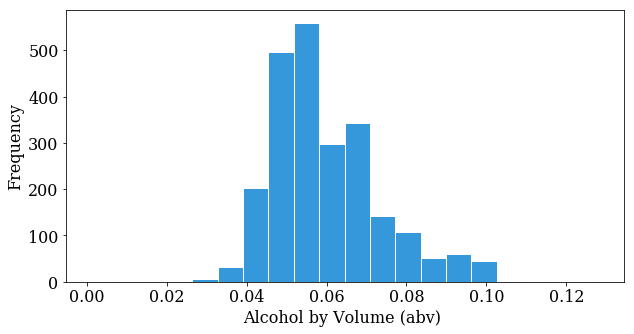

In [29]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.hist(abv, bins=20, color='#3498db', histtype='bar', edgecolor='white') 
#pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Alcohol by Volume (abv) ')
pyplot.ylabel('Frequency');

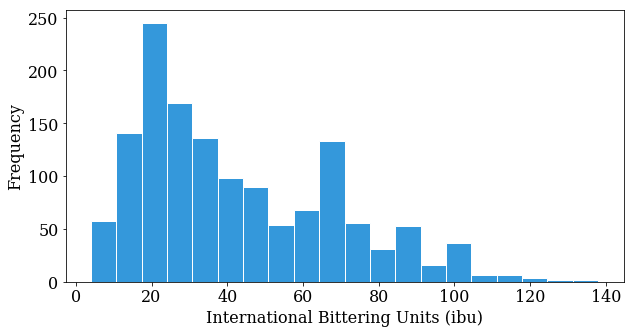

In [30]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.hist(ibu, bins=20, color='#3498db', histtype='bar', edgecolor='white') 
pyplot.xlabel('International Bittering Units (ibu)')
pyplot.ylabel('Frequency');

## References

1. [Craft beer datatset - Jean-Nicholas Hould](https://github.com/nickhould/craft-beers-dataset)
2. [Exploratory Data Analysis - Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
3. _Think Python: How to Think Like a Computer Scientist_ (2012). Allen Downey. Green Tea Press.  [PDF available](http://greenteapress.com/thinkpython/thinkpython.pdf)
4. [Intro to data Structures - pandas documentation](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)
5. _Think Stats: Probability and Statistics for Programmers_ version 1.6.0 (2011). Allen Downey. Green Tea Press.  [PDF available](http://greenteapress.com/thinkstats/thinkstats.pdf)

In [31]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../style/custom.css'
HTML(open(css_file, "r").read())